In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from functools import cache

import matplotlib

%matplotlib inline

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (14,9)
matplotlib.rcParams['savefig.bbox'] = 'tight'

import distr

In [4]:
event_5star = distr.wish_distr(.006, 0.32383924389327824, pity=75, hard=90)
event_4star = distr.wish_distr(.051, 1, pity=9, hard=10)
weap_5star = distr.wish_distr(.007, 0.375056953108059194274565981567885, pity=65, hard=80)
weap_4star = distr.wish_distr(.06, 1, pity=9, hard=10)

In [16]:
e_5s_multi = distr.MultiDistr(event_5star, 90)
e_4s_multi = distr.MultiDistr(event_4star, 10)
w_5s_multi = distr.MultiDistr(weap_5star, 80)
w_4s_multi = distr.MultiDistr(weap_4star, 10)

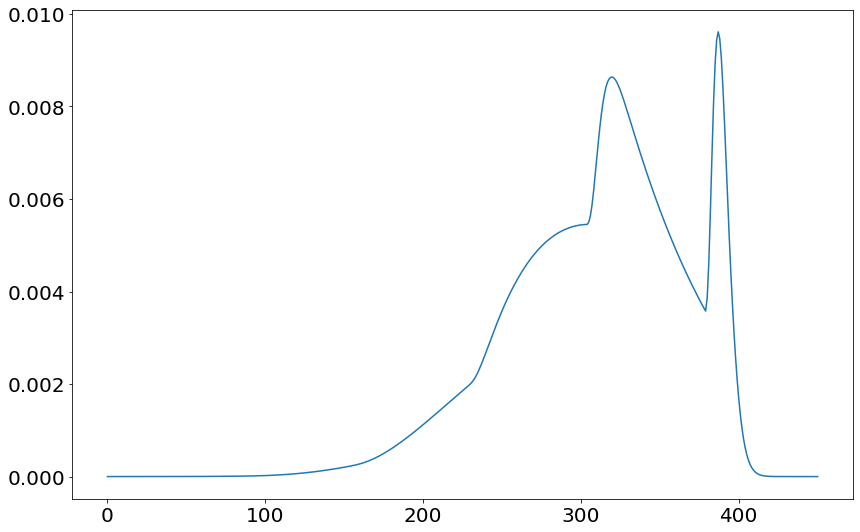

In [18]:
plt.plot([e_5s_multi.p_iter(w, 5) for w in range(90*5+1)])

In [19]:
def e_pan(n: int) -> float:
    if n == 0: return 0

    a2 = -.5 - 2 / (np.sqrt(13))
    a3= -.5 + 2 / (np.sqrt(13))
    l2 = (1+np.sqrt(13))/6
    l3 = (1-np.sqrt(13))/6
    return a2 * (l2-1) * l2**(n-1) + a3 * (l3-1) * l3**(n-1)

@cache
def e_4s_hit(w):
    return sum([e_pan(n) * e_4s_multi.p_iter(w, n) for n in range(w+1)])

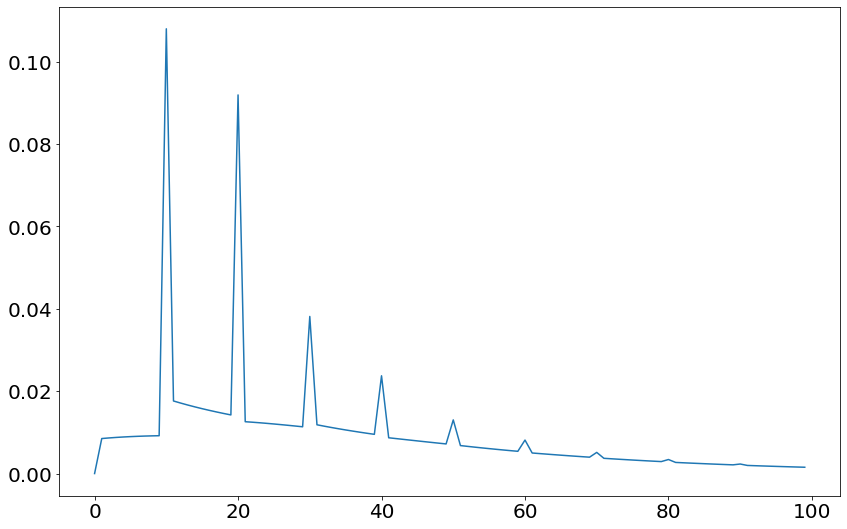

In [20]:
plt.plot([e_4s_hit(w) for w in range(100)])

In [21]:
def w_pan(n: int) -> float:
    if n == 0: return 0

    a2 = -.5 - 11/(4*np.sqrt(29))
    a3 = -.5 + 11/(4*np.sqrt(29))
    l2 = (3+np.sqrt(29)) / 10
    l3 = (3-np.sqrt(29)) / 10
    return a2 * (l2-1) * l2**(n-1) + a3 * (l3-1) * l3**(n-1)

@cache
def w_4s_hit(w):
    return sum([w_pan(n) * w_4s_multi.p_iter(w, n) for n in range(w+1)])

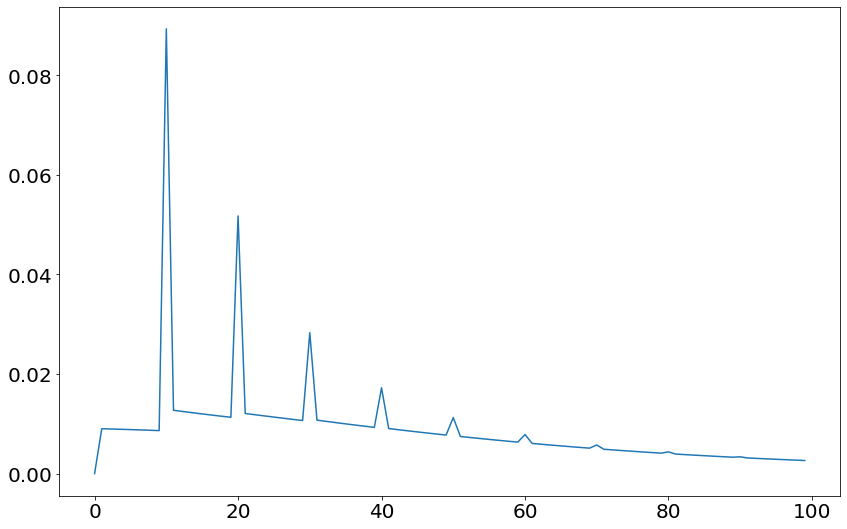

In [22]:
plt.plot([w_4s_hit(w) for w in range(100)])

In [23]:
def w5_pan(n: int) -> float:
    if n == 0: return 0

    a2 = -.5 - 7/(2*np.sqrt(41))
    a3 = -.5 + 7/(2*np.sqrt(41))
    l2 = (3+np.sqrt(41)) / 16
    l3 = (3-np.sqrt(41)) / 16
    return a2 * (l2-1) * l2**(n-1) + a3 * (l3-1) * l3**(n-1)

@cache
def w_5s_hit(w):
    return sum([w5_pan(n) * w_5s_multi.p_iter(w, n) for n in range(w+1)])

In [28]:
np.sum([w_5s_hit(w) for w in range(1000)])

0.999898012304135

In [30]:
np.sum(np.arange(1000) * [w_5s_hit(w) for w in range(1000)])

135.02248370913716

In [32]:
cdf = np.cumsum([w_5s_hit(w) for w in range(800)])

In [35]:
np.argmin(np.abs(cdf - .8))

201

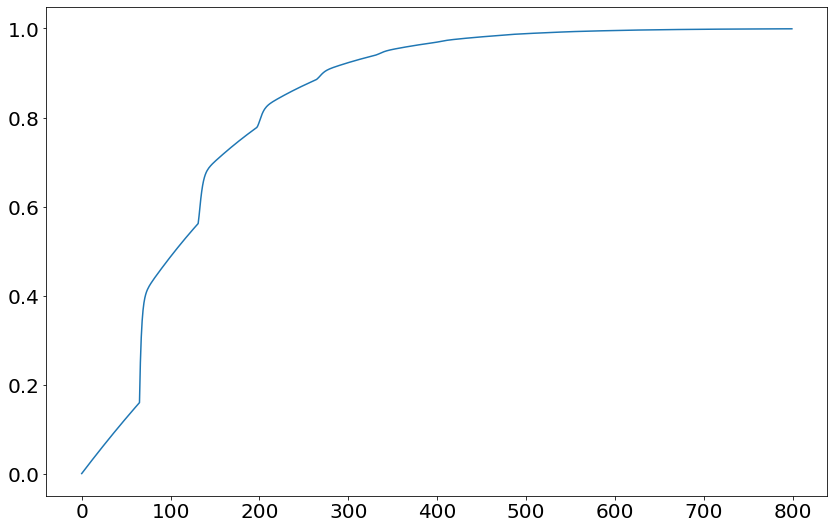

In [29]:
plt.plot(np.cumsum([w_5s_hit(w) for w in range(800)]))
# plt.plot([w_4s_hit(w) for w in range(100)])